# **01. Importación de librerías**

In [ ]:
# Instalamos el API de Yahoo Finance
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# Importamos las librerías a utilizar
import math # Funciones matemáticas básicas
import datetime # Manipulación de fechas

import numpy as np # Manipulación de arreglos
import pandas as pd # Manipulación de dataframes
import matplotlib.pyplot as plt # Generación de gráficas

import yfinance as yf # Datos de commodities

# Librerías de pre-procesamiento de datos
from sklearn.preprocessing import MinMaxScaler # Escalado de datos
from keras.models import Sequential # 
from keras.layers import Dense, LSTM #

# Desactivamos las advertencias
pd.options.mode.chained_assignment = None


# **02. Carga de datos**

In [ ]:
# Importamos la data de precios del crudo desde mayo del 2020
df = yf.download('CL=F', '2010-05-01')

# Verificamos si la tarea se ha realizado correctamente
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-05-03,86.199997,87.150002,85.830002,86.190002,86.190002,324726
2010-05-04,86.089996,86.239998,82.550003,82.739998,82.739998,497427
2010-05-05,82.129997,82.830002,79.150002,79.970001,79.970001,512285
2010-05-06,79.629997,80.389999,74.580002,77.110001,77.110001,605011
2010-05-07,76.949997,78.190002,74.510002,75.110001,75.110001,601534
...,...,...,...,...,...,...
2022-08-30,96.900002,97.660004,90.540001,91.639999,91.639999,386272
2022-08-31,92.309998,92.730003,88.269997,89.550003,89.550003,344147
2022-09-01,88.830002,89.629997,85.980003,86.610001,86.610001,305106


In [ ]:
# Verificamos las dimensiones del dataframe
print(len(df))


3109


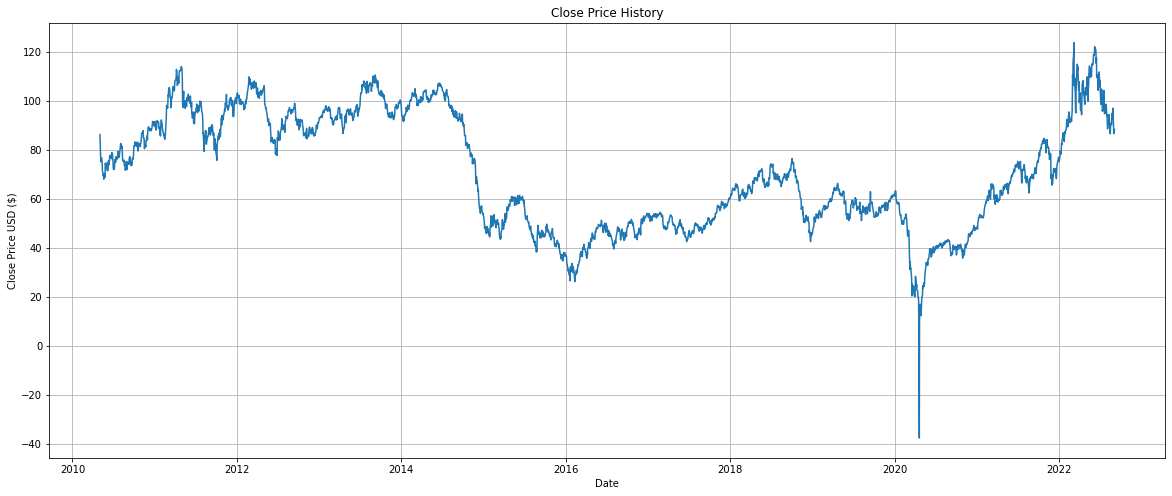

In [ ]:
# Graficamos los datos históricos de precios
plt.figure(figsize=(20,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.grid()
plt.show()


# **03. Pre-procesamiento de datos**

In [ ]:
# Conservamos solo la columna con los precios de cierre
data = df.filter(['Close'])

# Convertimos los valores a un listado
dataset = data.values

# Obtenemos la cantidad de datos para entrenamiento y prueba
test_data_len = 30
training_data_len = len(dataset) - test_data_len

# Imprimimos los resultados
print('Training Values:', training_data_len)
print('Test Values:', test_data_len)


Training Values: 3079
Test Values: 30


In [ ]:
# Escalamos los datos
scaler = MinMaxScaler(feature_range=(0,1)) # Escalamos los datos en el rango de 0 a 1
scaled_data = scaler.fit_transform(dataset) #

# Verificamos si la tarea se ha realizado correctamente
scaled_data


array([[0.76749523],
       [0.74611046],
       [0.7289407 ],
       ...,
       [0.77009858],
       [0.77171019],
       [0.78038802]])

In [ ]:
# Creamos los dataset de entrenamiento
train_data = scaled_data[0:training_data_len,:]

# Creamos dos arreglos donde colocaremos los datos de entrenamiento
x_train = []
y_train = []

# Aplicamos el desplazamiento
for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)


[array([0.76749523, 0.74611046, 0.7289407 , 0.71121306, 0.69881611,
       0.70929155, 0.7066262 , 0.70216329, 0.6944152 , 0.67712145,
       0.66763779, 0.66348482, 0.66633611, 0.65480695, 0.66738984,
       0.66844357, 0.6593938 , 0.67650161, 0.69534498, 0.69174985,
       0.68313398, 0.68486954, 0.69571687, 0.67650161, 0.67606772,
       0.67947685, 0.6942912 , 0.70110956, 0.69057213, 0.69887811,
       0.71015933, 0.71468419, 0.70922955, 0.71164695, 0.71561397,
       0.7118329 , 0.70650221, 0.70749399, 0.72206039, 0.71827932,
       0.70396086, 0.7020393 , 0.68542738, 0.68040663, 0.6794149 ,
       0.69236969, 0.70086162, 0.70489059, 0.69782433, 0.71146101,
       0.71077917, 0.70817582, 0.70439475, 0.70767993, 0.71325857,
       0.70780388, 0.72478774, 0.72280423, 0.72280423, 0.71363046])]
[0.7104692266856862]
[array([0.76749523, 0.74611046, 0.7289407 , 0.71121306, 0.69881611,
       0.70929155, 0.7066262 , 0.70216329, 0.6944152 , 0.67712145,
       0.66763779, 0.66348482, 0.6663

In [ ]:
# Convertimos a arreglos los listados de entrenamiento
x_train, y_train = np.array(x_train), np.array(y_train)

# Imprimimos de resultados
print(x_train)
print(y_train)


[[0.76749523 0.74611046 0.7289407  ... 0.72280423 0.72280423 0.71363046]
 [0.74611046 0.7289407  0.71121306 ... 0.72280423 0.71363046 0.71046923]
 [0.7289407  0.71121306 0.69881611 ... 0.71363046 0.71046923 0.71896115]
 ...
 [0.86363354 0.86561705 0.88631999 ... 0.86921218 0.87925373 0.86710472]
 [0.86561705 0.88631999 0.88216702 ... 0.87925373 0.86710472 0.83047171]
 [0.88631999 0.88216702 0.88514226 ... 0.86710472 0.83047171 0.82024422]]
[0.71046923 0.71896115 0.72261823 ... 0.83047171 0.82024422 0.83264117]


In [ ]:
# Adaptamos el arreglo para el entrenamiento de la red neuronal
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Verificamos la nueva forma del arreglo
x_train.shape


(3019, 60, 1)

# **04. Creación del modelo**

In [ ]:
# Construimos el modelo
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Realizamos el ajuste
model.fit(x_train, y_train, batch_size=1,epochs=1)


3019/3019 [==============================] - 89s 28ms/step - loss: 0.0012


In [ ]:
# Creamos el dataset de prueba
test_data = scaled_data[training_data_len - 60: , :]

# Creamos los listados donde almacenaremos los datos de entrada y salida para prueba
x_test = []
y_test = dataset[training_data_len:, :]

# Realizamos el desplazamiento
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])


In [ ]:
# Convertimos el listado de un arreglo
x_test = np.array(x_test)

# Imprimimos los resultados
x_test


array([[0.88216702, 0.88514226, 0.8680345 , ..., 0.83047171, 0.82024422,
        0.83264117],
       [0.88514226, 0.8680345 , 0.90150623, ..., 0.82024422, 0.83264117,
        0.82197983],
       [0.8680345 , 0.90150623, 0.90429557, ..., 0.83264117, 0.82197983,
        0.83611235],
       ...,
       [0.99014445, 0.98642537, 0.98121863, ..., 0.83456273, 0.8012769 ,
        0.78832211],
       [0.98642537, 0.98121863, 0.98283024, ..., 0.8012769 , 0.78832211,
        0.77009858],
       [0.98121863, 0.98283024, 0.97043329, ..., 0.78832211, 0.77009858,
        0.77171019]])

In [ ]:
# Adaptamos a las dimensiones necesarias
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Imprimimos los resultados
x_test


array([[[0.88216702],
        [0.88514226],
        [0.8680345 ],
        ...,
        [0.83047171],
        [0.82024422],
        [0.83264117]],

       [[0.88514226],
        [0.8680345 ],
        [0.90150623],
        ...,
        [0.82024422],
        [0.83264117],
        [0.82197983]],

       [[0.8680345 ],
        [0.90150623],
        [0.90429557],
        ...,
        [0.83264117],
        [0.82197983],
        [0.83611235]],

       ...,

       [[0.99014445],
        [0.98642537],
        [0.98121863],
        ...,
        [0.83456273],
        [0.8012769 ],
        [0.78832211]],

       [[0.98642537],
        [0.98121863],
        [0.98283024],
        ...,
        [0.8012769 ],
        [0.78832211],
        [0.77009858]],

       [[0.98121863],
        [0.98283024],
        [0.97043329],
        ...,
        [0.78832211],
        [0.77009858],
        [0.77171019]]])

# **05. Predicción**

In [ ]:
# Realizamos la predicción
predictions = model.predict(x_test)

# Aplicamos transformación inversa para obtener los valores de precios
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Calculamos el RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)

# Imprimimos el resultado
print('RMSE:', round(rmse, 2))


RMSE: 2.22


# **06. Visualización de resultados**

In [ ]:
# Creamos un dataframe donde almacenaremos los datos de entrenamiento
train = pd.DataFrame()
train['Close'] = data[:training_data_len]

# Reinicializamos los índices
train = train.reset_index()

# Verificamos si la tarea se ha realizado correctamente
train


,Date,Close
0,2010-05-03,86.190002
1,2010-05-04,82.739998
2,2010-05-05,79.970001
3,2010-05-06,77.110001
4,2010-05-07,75.110001
...,...,...
3074,2022-07-19,104.220001
3075,2022-07-20,102.260002
3076,2022-07-21,96.349998
3077,2022-07-22,94.699997


In [ ]:
# Creamos un dataframe donde almacenaremos los datos de prueba y la predicción
valid = pd.DataFrame()
valid['Close'] = data[training_data_len:]
valid['Predictions'] = predictions

# Reinicializamos los índices
valid = valid.reset_index()

# Verificamos si la tarea se ha realizado correctamente
valid


,Date,Close,Predictions
0,2022-07-26,94.980003,99.656708
1,2022-07-27,97.260002,98.499054
2,2022-07-28,96.419998,98.030830
3,2022-07-29,98.620003,97.757866
4,2022-08-01,93.889999,98.103462
5,2022-08-02,94.419998,97.647858
6,2022-08-03,90.660004,97.098122
7,2022-08-04,88.540001,95.817085
8,2022-08-05,89.010002,94.067749
9,2022-08-08,90.760002,92.565750


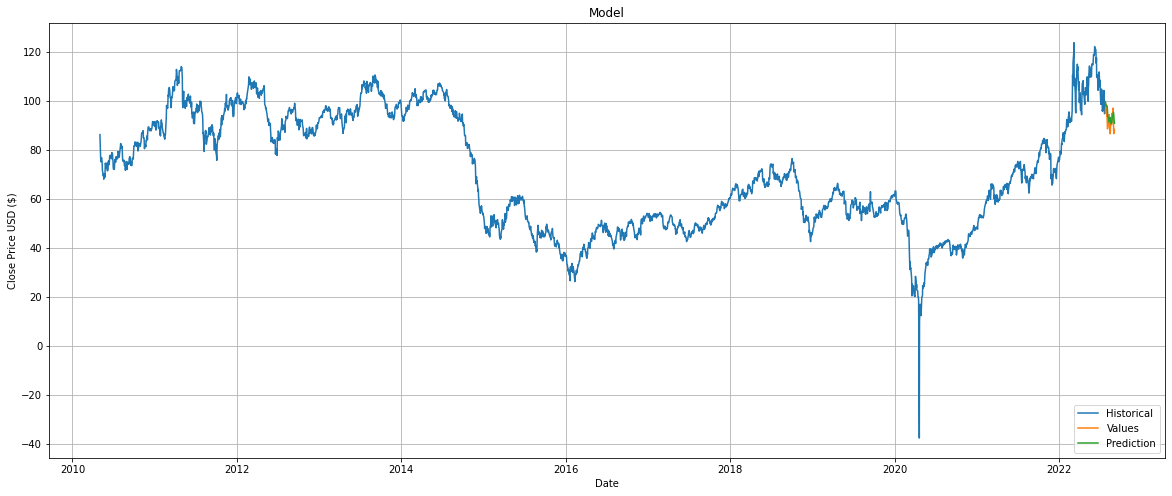

In [ ]:
# Graficamos los resultados
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Date'], train['Close'], label='Historical')
plt.plot(valid['Date'], valid['Close'], label='Values')
plt.plot(valid['Date'], valid['Predictions'], label='Prediction')
plt.legend(loc='lower right')
plt.grid()
plt.show()


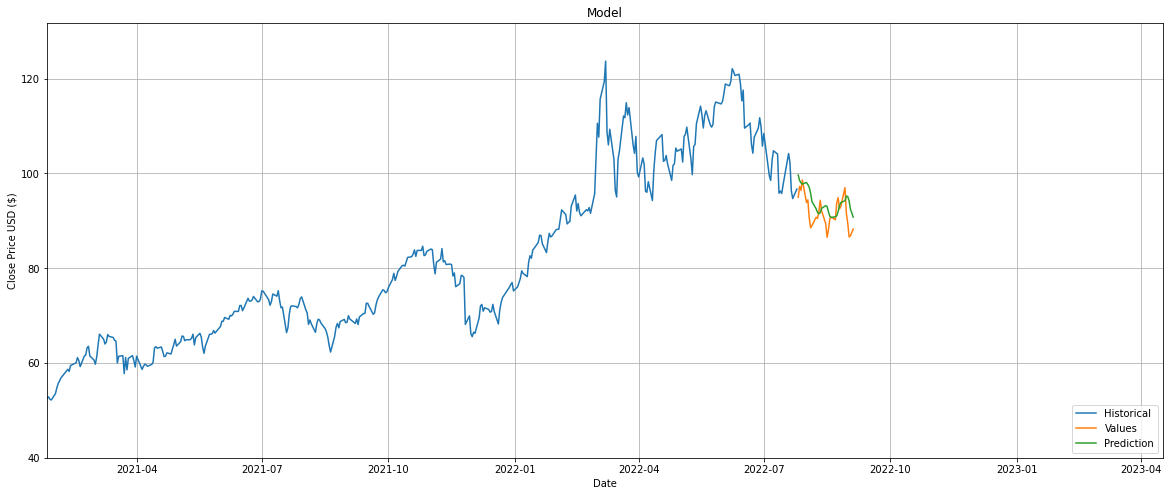

In [ ]:
# Amplicamos la imagen
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Date'], train['Close'], label='Historical')
plt.plot(valid['Date'], valid['Close'], label='Values')
plt.plot(valid['Date'], valid['Predictions'], label='Prediction')
plt.legend(loc='lower right')
plt.xlim(datetime.date(2021, 1, 26))
plt.ylim(40)
plt.grid()
plt.show()


In [ ]:
# Verificamos los valores históricos versus los predichos
valid


,Date,Close,Predictions
0,2022-07-26,94.980003,99.656708
1,2022-07-27,97.260002,98.499054
2,2022-07-28,96.419998,98.030830
3,2022-07-29,98.620003,97.757866
4,2022-08-01,93.889999,98.103462
5,2022-08-02,94.419998,97.647858
6,2022-08-03,90.660004,97.098122
7,2022-08-04,88.540001,95.817085
8,2022-08-05,89.010002,94.067749
9,2022-08-08,90.760002,92.565750
